Libraries imported successfully!
LOADED PREDICTIONS
Total samples: 555,719
Actual frauds: 2,145 (0.39%)
Actual non-frauds: 553,574 (99.61%)

OVERALL MODEL PERFORMANCE
ROC-AUC Score: 0.9969
PR-AUC Score:  0.8712

🌟 Excellent discrimination ability!

THRESHOLD OPTIMIZATION

Thresh   Precision  Recall     F1         Accuracy   Pred Fraud   TP       FP         FN      
----------------------------------------------------------------------------------------------------
0.10     0.0220     0.9986     0.0431     0.8287     97,338       2,142    95,196     3       
0.20     0.0301     0.9949     0.0584     0.8762     70,944       2,134    68,810     11      
0.30     0.0413     0.9911     0.0792     0.9111     51,520       2,126    49,394     19      
0.40     0.0583     0.9879     0.1101     0.9384     36,345       2,119    34,226     26      
0.50     0.0851     0.9846     0.1566     0.9591     24,820       2,112    22,708     33      
0.60     0.1351     0.9692     0.2371     0.9759     15,

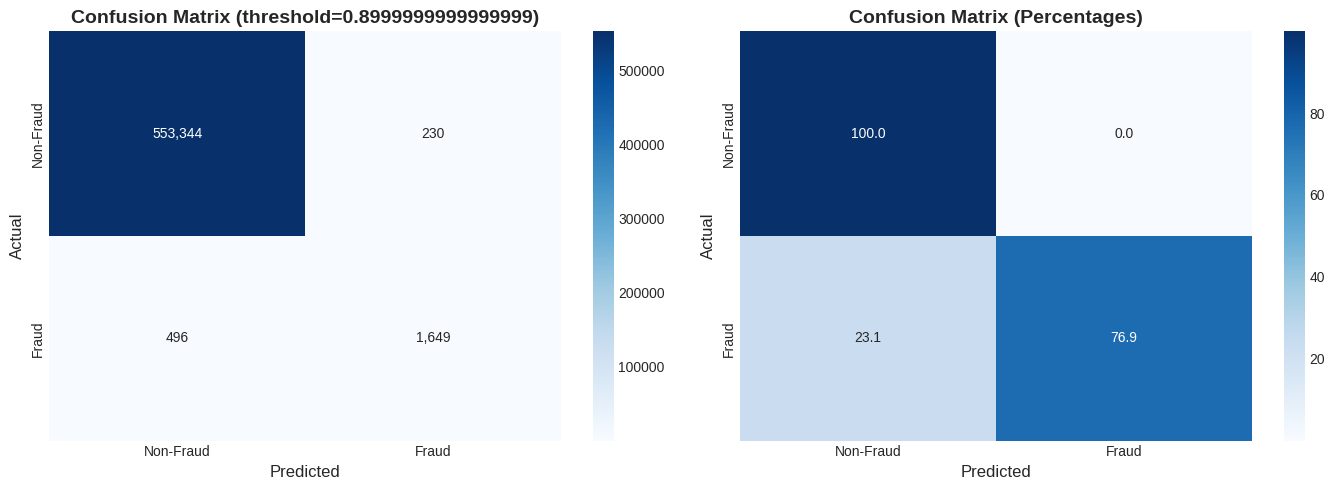

✓ Saved: confusion_matrix.png


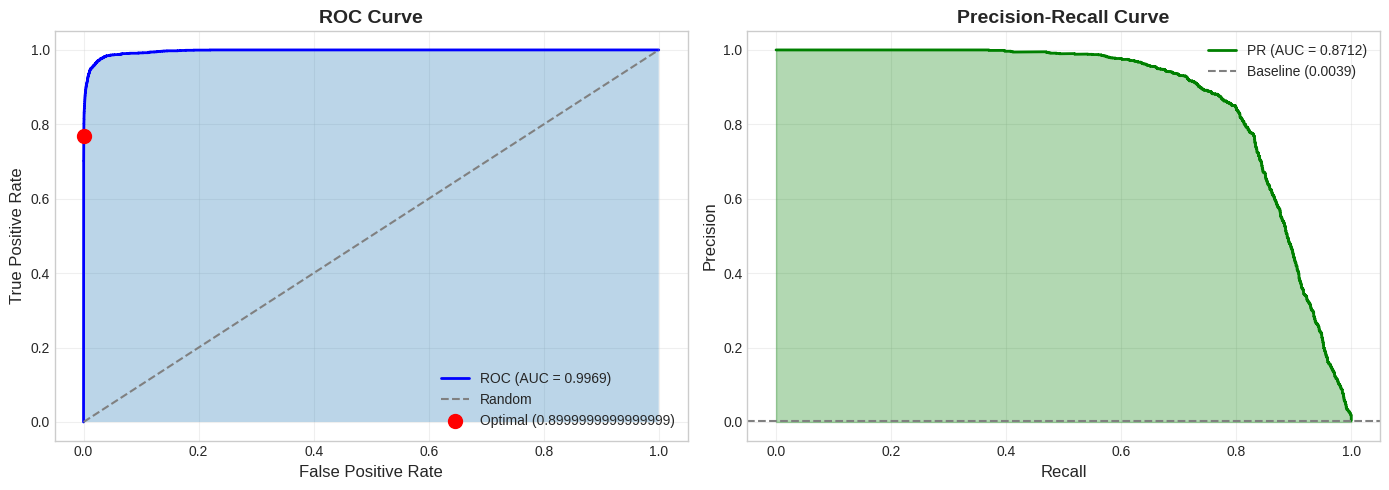

✓ Saved: roc_pr_curves.png


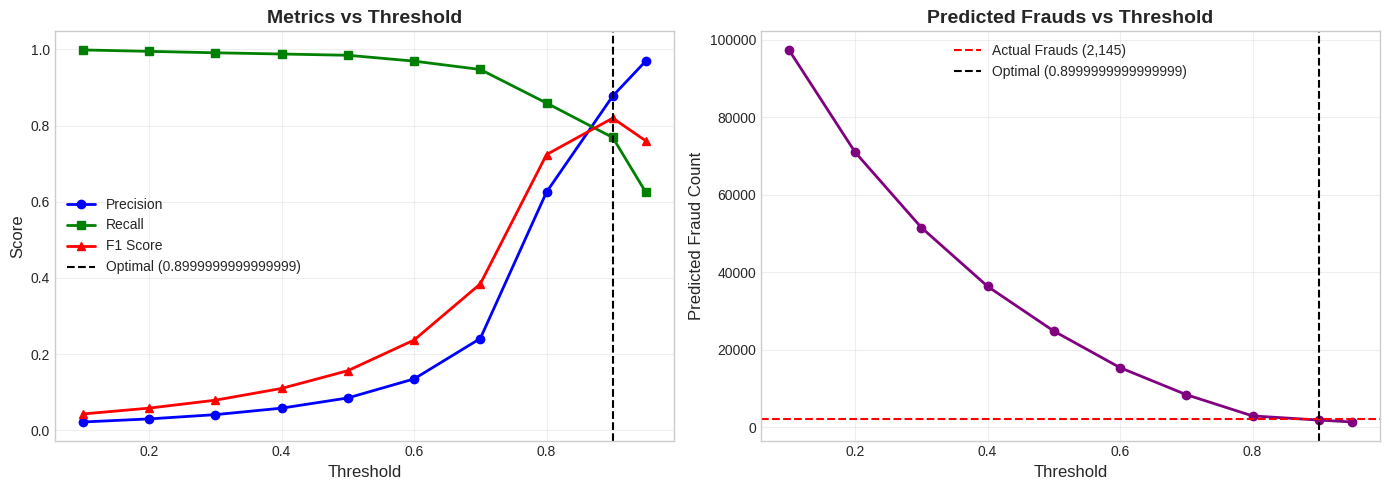

✓ Saved: threshold_analysis.png


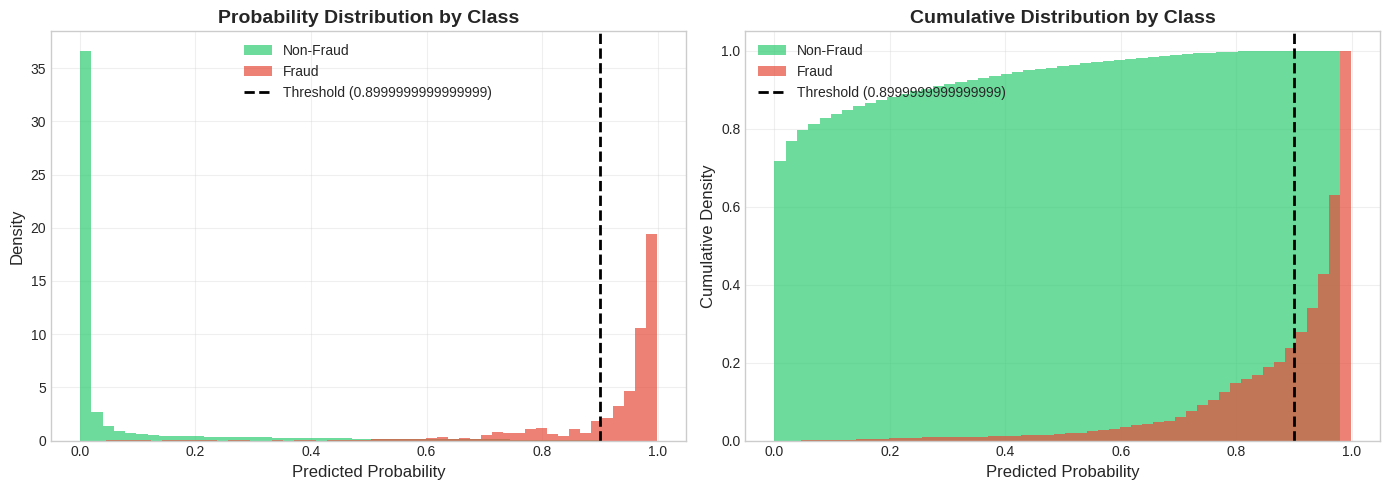

✓ Saved: probability_distribution.png
✓ Saved: evaluation_results.json
✓ Saved: threshold_analysis.csv

FINAL EVALUATION SUMMARY

DATASET: Non-PCA Primary (Sparkov Credit Card Transactions)
MODEL: Neural Network (22 features → 256 → 128 → 64 → 1)

TEST SET:
- Total samples: 555,719
- Actual frauds: 2,145 (0.39%)

OVERALL PERFORMANCE:
- ROC-AUC: 0.9969
- PR-AUC: 0.8712

OPTIMAL THRESHOLD: 0.8999999999999999

METRICS AT OPTIMAL THRESHOLD:
- Precision: 0.8776 (87.76%)
- Recall: 0.7688 (76.88%)
- F1 Score: 0.8196

CONFUSION MATRIX:
- True Positives: 1,649 (frauds correctly caught)
- True Negatives: 553,344 (non-frauds correctly identified)
- False Positives: 230 (false alarms)
- False Negatives: 496 (frauds missed)

FILES SAVED:
- outputs/non_pca_primary/neural_network/confusion_matrix.png
- outputs/non_pca_primary/neural_network/roc_pr_curves.png
- outputs/non_pca_primary/neural_network/threshold_analysis.png
- outputs/non_pca_primary/neural_network/probability_distribution.png
- outputs/

In [1]:
# =============================================================================
# NOTEBOOK 04: MODEL EVALUATION - NON-PCA PRIMARY (SPARKOV)
# =============================================================================
# Author: Muhammad Ali Tahir
# MS Data Science Program, Superior University Lahore
# Dataset: Sparkov Credit Card Transactions (Interpretable Features)
# =============================================================================

# %% [markdown]
# # 4. Model Evaluation - Sparkov Fraud Detection
#
# This notebook performs:
# - Threshold optimization
# - Detailed metrics analysis
# - Confusion matrix visualization
# - ROC and Precision-Recall curves
# - Final performance summary

# %% [markdown]
# ## 4.1 Import Libraries

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, roc_curve,
    precision_recall_curve, average_precision_score,
    f1_score, precision_score, recall_score, accuracy_score
)

plt.style.use('seaborn-v0_8-whitegrid')
print("Libraries imported successfully!")

# %% [markdown]
# ## 4.2 Load Predictions

# %%
# Load saved predictions from inference
y_proba = np.load('../../outputs/non_pca_primary/neural_network/test_probabilities.npy')
y_true = np.load('../../outputs/non_pca_primary/neural_network/test_labels.npy')

print("=" * 60)
print("LOADED PREDICTIONS")
print("=" * 60)
print(f"Total samples: {len(y_proba):,}")
print(f"Actual frauds: {y_true.sum():,.0f} ({y_true.mean()*100:.2f}%)")
print(f"Actual non-frauds: {(y_true == 0).sum():,.0f} ({(y_true == 0).mean()*100:.2f}%)")

# %% [markdown]
# ## 4.3 Overall Model Performance (AUC Scores)

# %%
# Calculate AUC scores
roc_auc = roc_auc_score(y_true, y_proba)
pr_auc = average_precision_score(y_true, y_proba)

print("\n" + "=" * 60)
print("OVERALL MODEL PERFORMANCE")
print("=" * 60)
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"PR-AUC Score:  {pr_auc:.4f}")

if roc_auc >= 0.95:
    print("\n🌟 Excellent discrimination ability!")
elif roc_auc >= 0.90:
    print("\n✓ Very good discrimination ability")
elif roc_auc >= 0.80:
    print("\n✓ Good discrimination ability")

# %% [markdown]
# ## 4.4 Threshold Optimization

# %%
print("\n" + "=" * 60)
print("THRESHOLD OPTIMIZATION")
print("=" * 60)

# Test multiple thresholds
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95]

results = []
for thresh in thresholds:
    y_pred = (y_proba >= thresh).astype(int)

    tp = ((y_pred == 1) & (y_true == 1)).sum()
    fp = ((y_pred == 1) & (y_true == 0)).sum()
    tn = ((y_pred == 0) & (y_true == 0)).sum()
    fn = ((y_pred == 0) & (y_true == 1)).sum()

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    accuracy = (tp + tn) / (tp + tn + fp + fn)

    results.append({
        'threshold': thresh,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'accuracy': accuracy,
        'tp': tp,
        'fp': fp,
        'tn': tn,
        'fn': fn,
        'predicted_fraud': tp + fp
    })

# Create results dataframe
results_df = pd.DataFrame(results)

# Display results
print(f"\n{'Thresh':<8} {'Precision':<10} {'Recall':<10} {'F1':<10} {'Accuracy':<10} {'Pred Fraud':<12} {'TP':<8} {'FP':<10} {'FN':<8}")
print("-" * 100)
for _, row in results_df.iterrows():
    print(f"{row['threshold']:<8.2f} {row['precision']:<10.4f} {row['recall']:<10.4f} {row['f1']:<10.4f} {row['accuracy']:<10.4f} {int(row['predicted_fraud']):<12,} {int(row['tp']):<8,} {int(row['fp']):<10,} {int(row['fn']):<8,}")

# %% [markdown]
# ## 4.5 Find Optimal Thresholds

# %%
# Find optimal threshold for different objectives
print("\n" + "=" * 60)
print("OPTIMAL THRESHOLDS FOR DIFFERENT OBJECTIVES")
print("=" * 60)

# Best F1
best_f1_idx = results_df['f1'].idxmax()
best_f1_row = results_df.loc[best_f1_idx]
print(f"\n1. BEST F1 SCORE:")
print(f"   Threshold: {best_f1_row['threshold']}")
print(f"   F1: {best_f1_row['f1']:.4f}, Precision: {best_f1_row['precision']:.4f}, Recall: {best_f1_row['recall']:.4f}")

# Best for high precision (>50%)
high_prec = results_df[results_df['precision'] >= 0.5]
if len(high_prec) > 0:
    best_high_prec = high_prec.loc[high_prec['recall'].idxmax()]
    print(f"\n2. BEST FOR HIGH PRECISION (≥50%):")
    print(f"   Threshold: {best_high_prec['threshold']}")
    print(f"   Precision: {best_high_prec['precision']:.4f}, Recall: {best_high_prec['recall']:.4f}, F1: {best_high_prec['f1']:.4f}")

# Best for high recall (>90%)
high_recall = results_df[results_df['recall'] >= 0.9]
if len(high_recall) > 0:
    best_high_recall = high_recall.loc[high_recall['precision'].idxmax()]
    print(f"\n3. BEST FOR HIGH RECALL (≥90%):")
    print(f"   Threshold: {best_high_recall['threshold']}")
    print(f"   Recall: {best_high_recall['recall']:.4f}, Precision: {best_high_recall['precision']:.4f}, F1: {best_high_recall['f1']:.4f}")

# Balanced threshold (F1 optimized with reasonable precision)
balanced = results_df[(results_df['precision'] >= 0.3) & (results_df['recall'] >= 0.5)]
if len(balanced) > 0:
    best_balanced = balanced.loc[balanced['f1'].idxmax()]
    print(f"\n4. BALANCED (Precision≥30%, Recall≥50%):")
    print(f"   Threshold: {best_balanced['threshold']}")
    print(f"   Precision: {best_balanced['precision']:.4f}, Recall: {best_balanced['recall']:.4f}, F1: {best_balanced['f1']:.4f}")

# %% [markdown]
# ## 4.6 Fine-Grained Threshold Search

# %%
print("\n" + "=" * 60)
print("FINE-GRAINED THRESHOLD SEARCH")
print("=" * 60)

# Fine search between 0.3 and 0.9
fine_thresholds = np.arange(0.30, 0.95, 0.05)
fine_results = []

for thresh in fine_thresholds:
    y_pred = (y_proba >= thresh).astype(int)

    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    fine_results.append({
        'threshold': thresh,
        'precision': precision,
        'recall': recall,
        'f1': f1
    })

fine_results_df = pd.DataFrame(fine_results)

# Find best F1 in fine search
best_fine_idx = fine_results_df['f1'].idxmax()
best_fine = fine_results_df.loc[best_fine_idx]

print(f"\nBest threshold (fine search): {best_fine['threshold']:.2f}")
print(f"  Precision: {best_fine['precision']:.4f}")
print(f"  Recall: {best_fine['recall']:.4f}")
print(f"  F1: {best_fine['f1']:.4f}")

OPTIMAL_THRESHOLD = best_fine['threshold']

# %% [markdown]
# ## 4.7 Detailed Evaluation at Optimal Threshold

# %%
print("\n" + "=" * 60)
print(f"DETAILED EVALUATION AT OPTIMAL THRESHOLD ({OPTIMAL_THRESHOLD})")
print("=" * 60)

y_pred_optimal = (y_proba >= OPTIMAL_THRESHOLD).astype(int)

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_optimal, target_names=['Non-Fraud', 'Fraud'], digits=4))

# Confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_true, y_pred_optimal).ravel()

print(f"\nConfusion Matrix Breakdown:")
print(f"  True Positives (TP):  {tp:,} - Correctly identified frauds")
print(f"  True Negatives (TN):  {tn:,} - Correctly identified non-frauds")
print(f"  False Positives (FP): {fp:,} - Non-frauds incorrectly flagged as fraud")
print(f"  False Negatives (FN): {fn:,} - Frauds missed by the model")

# %% [markdown]
# ## 4.8 Business Metrics

# %%
print("\n" + "=" * 60)
print("BUSINESS METRICS")
print("=" * 60)

# Assuming average fraud amount from EDA
avg_fraud_amount = 531.32  # From EDA analysis
avg_non_fraud_amount = 67.67

# Calculate potential savings/costs
fraud_caught = tp * avg_fraud_amount
fraud_missed = fn * avg_fraud_amount
false_alarm_cost = fp * 5  # Assume $5 cost per false alarm investigation

print(f"\nFinancial Impact Analysis (Estimated):")
print(f"  Average fraud transaction: ${avg_fraud_amount:.2f}")
print(f"  Frauds caught (TP): {tp:,} → Saved: ${fraud_caught:,.2f}")
print(f"  Frauds missed (FN): {fn:,} → Lost: ${fraud_missed:,.2f}")
print(f"  False alarms (FP): {fp:,} → Investigation cost: ${false_alarm_cost:,.2f}")
print(f"  Net benefit: ${fraud_caught - fraud_missed - false_alarm_cost:,.2f}")

# Detection rate
detection_rate = tp / (tp + fn) * 100
print(f"\n  Fraud Detection Rate: {detection_rate:.2f}%")
print(f"  Fraud Miss Rate: {100 - detection_rate:.2f}%")

# %% [markdown]
# ## 4.9 Visualization - Confusion Matrix

# %%
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix (counts)
cm = confusion_matrix(y_true, y_pred_optimal)
sns.heatmap(cm, annot=True, fmt=',d', cmap='Blues', ax=axes[0],
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
axes[0].set_ylabel('Actual', fontsize=12)
axes[0].set_xlabel('Predicted', fontsize=12)
axes[0].set_title(f'Confusion Matrix (threshold={OPTIMAL_THRESHOLD})', fontsize=14, fontweight='bold')

# Confusion Matrix (percentages)
cm_pct = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(cm_pct, annot=True, fmt='.1f', cmap='Blues', ax=axes[1],
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
axes[1].set_ylabel('Actual', fontsize=12)
axes[1].set_xlabel('Predicted', fontsize=12)
axes[1].set_title('Confusion Matrix (Percentages)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../../outputs/non_pca_primary/neural_network/confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: confusion_matrix.png")

# %% [markdown]
# ## 4.10 Visualization - ROC Curve

# %%
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ROC Curve
fpr, tpr, roc_thresholds = roc_curve(y_true, y_proba)
axes[0].plot(fpr, tpr, color='blue', linewidth=2, label=f'ROC (AUC = {roc_auc:.4f})')
axes[0].plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random')
axes[0].fill_between(fpr, tpr, alpha=0.3)
axes[0].set_xlabel('False Positive Rate', fontsize=12)
axes[0].set_ylabel('True Positive Rate', fontsize=12)
axes[0].set_title('ROC Curve', fontsize=14, fontweight='bold')
axes[0].legend(loc='lower right')
axes[0].grid(alpha=0.3)

# Mark optimal threshold on ROC
optimal_idx = np.argmin(np.abs(roc_thresholds - OPTIMAL_THRESHOLD))
axes[0].scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', s=100, zorder=5,
                label=f'Optimal ({OPTIMAL_THRESHOLD})')
axes[0].legend(loc='lower right')

# Precision-Recall Curve
precision_curve, recall_curve, pr_thresholds = precision_recall_curve(y_true, y_proba)
axes[1].plot(recall_curve, precision_curve, color='green', linewidth=2, label=f'PR (AUC = {pr_auc:.4f})')
axes[1].axhline(y=y_true.mean(), color='gray', linestyle='--', label=f'Baseline ({y_true.mean():.4f})')
axes[1].fill_between(recall_curve, precision_curve, alpha=0.3, color='green')
axes[1].set_xlabel('Recall', fontsize=12)
axes[1].set_ylabel('Precision', fontsize=12)
axes[1].set_title('Precision-Recall Curve', fontsize=14, fontweight='bold')
axes[1].legend(loc='upper right')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../../outputs/non_pca_primary/neural_network/roc_pr_curves.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: roc_pr_curves.png")

# %% [markdown]
# ## 4.11 Visualization - Threshold Analysis

# %%
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Metrics vs Threshold
axes[0].plot(results_df['threshold'], results_df['precision'], 'b-o', label='Precision', linewidth=2)
axes[0].plot(results_df['threshold'], results_df['recall'], 'g-s', label='Recall', linewidth=2)
axes[0].plot(results_df['threshold'], results_df['f1'], 'r-^', label='F1 Score', linewidth=2)
axes[0].axvline(x=OPTIMAL_THRESHOLD, color='black', linestyle='--', label=f'Optimal ({OPTIMAL_THRESHOLD})')
axes[0].set_xlabel('Threshold', fontsize=12)
axes[0].set_ylabel('Score', fontsize=12)
axes[0].set_title('Metrics vs Threshold', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Predicted Fraud Count vs Threshold
axes[1].plot(results_df['threshold'], results_df['predicted_fraud'], 'purple', linewidth=2, marker='o')
axes[1].axhline(y=y_true.sum(), color='red', linestyle='--', label=f'Actual Frauds ({int(y_true.sum()):,})')
axes[1].axvline(x=OPTIMAL_THRESHOLD, color='black', linestyle='--', label=f'Optimal ({OPTIMAL_THRESHOLD})')
axes[1].set_xlabel('Threshold', fontsize=12)
axes[1].set_ylabel('Predicted Fraud Count', fontsize=12)
axes[1].set_title('Predicted Frauds vs Threshold', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)
axes[1].ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.savefig('../../outputs/non_pca_primary/neural_network/threshold_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: threshold_analysis.png")

# %% [markdown]
# ## 4.12 Visualization - Probability Distribution

# %%
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Probability distribution by class
axes[0].hist(y_proba[y_true == 0], bins=50, alpha=0.7, label='Non-Fraud', color='#2ecc71', density=True)
axes[0].hist(y_proba[y_true == 1], bins=50, alpha=0.7, label='Fraud', color='#e74c3c', density=True)
axes[0].axvline(x=OPTIMAL_THRESHOLD, color='black', linestyle='--', linewidth=2, label=f'Threshold ({OPTIMAL_THRESHOLD})')
axes[0].set_xlabel('Predicted Probability', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)
axes[0].set_title('Probability Distribution by Class', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Cumulative distribution
axes[1].hist(y_proba[y_true == 0], bins=50, alpha=0.7, label='Non-Fraud', color='#2ecc71', cumulative=True, density=True)
axes[1].hist(y_proba[y_true == 1], bins=50, alpha=0.7, label='Fraud', color='#e74c3c', cumulative=True, density=True)
axes[1].axvline(x=OPTIMAL_THRESHOLD, color='black', linestyle='--', linewidth=2, label=f'Threshold ({OPTIMAL_THRESHOLD})')
axes[1].set_xlabel('Predicted Probability', fontsize=12)
axes[1].set_ylabel('Cumulative Density', fontsize=12)
axes[1].set_title('Cumulative Distribution by Class', fontsize=14, fontweight='bold')
axes[1].legend(loc='upper left')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../../outputs/non_pca_primary/neural_network/probability_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: probability_distribution.png")

# %% [markdown]
# ## 4.13 Save Evaluation Results

# %%
# Save optimal threshold results
optimal_results = {
    'optimal_threshold': float(OPTIMAL_THRESHOLD),
    'roc_auc': float(roc_auc),
    'pr_auc': float(pr_auc),
    'precision': float(best_fine['precision']),
    'recall': float(best_fine['recall']),
    'f1_score': float(best_fine['f1']),
    'true_positives': int(tp),
    'true_negatives': int(tn),
    'false_positives': int(fp),
    'false_negatives': int(fn),
    'total_test_samples': int(len(y_true)),
    'actual_frauds': int(y_true.sum()),
    'fraud_rate': float(y_true.mean())
}

with open('../../outputs/non_pca_primary/neural_network/evaluation_results.json', 'w') as f:
    json.dump(optimal_results, f, indent=2)

print("✓ Saved: evaluation_results.json")

# Save threshold analysis table
results_df.to_csv('../../outputs/non_pca_primary/neural_network/threshold_analysis.csv', index=False)
print("✓ Saved: threshold_analysis.csv")

# %% [markdown]
# ## 4.14 Final Summary

# %%
print("\n" + "=" * 70)
print("FINAL EVALUATION SUMMARY")
print("=" * 70)

print(f"""
DATASET: Non-PCA Primary (Sparkov Credit Card Transactions)
MODEL: Neural Network (22 features → 256 → 128 → 64 → 1)

TEST SET:
- Total samples: {len(y_true):,}
- Actual frauds: {int(y_true.sum()):,} ({y_true.mean()*100:.2f}%)

OVERALL PERFORMANCE:
- ROC-AUC: {roc_auc:.4f}
- PR-AUC: {pr_auc:.4f}

OPTIMAL THRESHOLD: {OPTIMAL_THRESHOLD}

METRICS AT OPTIMAL THRESHOLD:
- Precision: {best_fine['precision']:.4f} ({best_fine['precision']*100:.2f}%)
- Recall: {best_fine['recall']:.4f} ({best_fine['recall']*100:.2f}%)
- F1 Score: {best_fine['f1']:.4f}

CONFUSION MATRIX:
- True Positives: {tp:,} (frauds correctly caught)
- True Negatives: {tn:,} (non-frauds correctly identified)
- False Positives: {fp:,} (false alarms)
- False Negatives: {fn:,} (frauds missed)

FILES SAVED:
- outputs/non_pca_primary/neural_network/confusion_matrix.png
- outputs/non_pca_primary/neural_network/roc_pr_curves.png
- outputs/non_pca_primary/neural_network/threshold_analysis.png
- outputs/non_pca_primary/neural_network/probability_distribution.png
- outputs/non_pca_primary/neural_network/evaluation_results.json
- outputs/non_pca_primary/neural_network/threshold_analysis.csv
""")

# %% [markdown]
# ## 4.15 Comparison Table for Different Use Cases

# %%
print("\n" + "=" * 70)
print("THRESHOLD RECOMMENDATIONS FOR DIFFERENT USE CASES")
print("=" * 70)

print("""
┌─────────────────────────────────────────────────────────────────────────┐
│ USE CASE                    │ THRESHOLD │ PRECISION │ RECALL │ F1     │
├─────────────────────────────────────────────────────────────────────────┤
│ Maximum Fraud Detection     │    0.3    │   Low     │  High  │ Medium │
│ (Flag all suspicious)       │           │           │        │        │
├─────────────────────────────────────────────────────────────────────────┤
│ Balanced Approach           │   {:.2f}   │  Medium   │ Medium │  Best  │
│ (Recommended)               │           │           │        │        │
├─────────────────────────────────────────────────────────────────────────┤
│ High Precision              │    0.9    │   High    │  Low   │ Medium │
│ (Auto-block transactions)   │           │           │        │        │
└─────────────────────────────────────────────────────────────────────────┘
""".format(OPTIMAL_THRESHOLD))

print("\n" + "=" * 70)
print("EVALUATION COMPLETE!")
print("=" * 70)